# Social Distancing and Enforcement: Parks Patrol Data Analysis

Data import and cleaning 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data
data = pd.read_excel("Social_Distancing_and_Enforcement__Parks_Patrol_Data.xlsx")

In [3]:
data.shape # # dimesions of the data

(63389, 24)

In [4]:
data.head()

,encounter_datetime,park_area_id,park_division,visit_reason,patrol_method,encounter_type,simplified_encounter_type,closed_amenity,closed_patroncount,closed_education,...,sd_patronsnocomply,sd_amenity,sd_pdcontact,sd_outcome_spec,summonscount_a01,summonscount_a03,summonscount_a04,summonscount_a22,other_summonscount,park_borough
0,2020-08-07 10:45:00,B025,PEP,NaN,NaN,"No encounter with non-compliant patrons, the p...",No Encounter,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brooklyn
1,2020-08-07 11:08:00,R030,PEP,NaN,NaN,"No encounter with non-compliant patrons, the p...",No Encounter,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Staten Island
2,2020-08-07 10:44:00,R150,PEP,NaN,NaN,"No encounter with non-compliant patrons, the p...",No Encounter,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Staten Island
3,2020-08-07 10:25:00,B114,PEP,NaN,NaN,"No encounter with non-compliant patrons, the p...",No Encounter,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brooklyn
4,2020-08-07 10:08:00,R109,PEP,NaN,NaN,"No encounter with non-compliant patrons, the p...",No Encounter,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Staten Island


In [5]:
data.info() #info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63389 entries, 0 to 63388
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   encounter_datetime         63270 non-null  object 
 1   park_area_id               63378 non-null  object 
 2   park_division              63389 non-null  object 
 3   visit_reason               27615 non-null  object 
 4   patrol_method              27615 non-null  object 
 5   encounter_type             63388 non-null  object 
 6   simplified_encounter_type  63388 non-null  object 
 7   closed_amenity             2572 non-null   object 
 8   closed_patroncount         2570 non-null   float64
 9   closed_education           2452 non-null   object 
 10  closed_outcome             2452 non-null   object 
 11  closed_pdcontact           2056 non-null   object 
 12  closed_outcome_spec        120 non-null    object 
 13  sd_patronscomplied         3856 non-null   flo

In [6]:
data.dtypes  # types of the data

encounter_datetime            object
park_area_id                  object
park_division                 object
visit_reason                  object
patrol_method                 object
encounter_type                object
simplified_encounter_type     object
closed_amenity                object
closed_patroncount           float64
closed_education              object
closed_outcome                object
closed_pdcontact              object
closed_outcome_spec           object
sd_patronscomplied           float64
sd_patronsnocomply           float64
sd_amenity                    object
sd_pdcontact                  object
sd_outcome_spec               object
summonscount_a01             float64
summonscount_a03             float64
summonscount_a04             float64
summonscount_a22             float64
other_summonscount           float64
park_borough                  object
dtype: object

In [7]:
data.isnull().sum() # checking null values

encounter_datetime             119
park_area_id                    11
park_division                    0
visit_reason                 35774
patrol_method                35774
encounter_type                   1
simplified_encounter_type        1
closed_amenity               60817
closed_patroncount           60819
closed_education             60937
closed_outcome               60937
closed_pdcontact             61333
closed_outcome_spec          63269
sd_patronscomplied           59533
sd_patronsnocomply           59532
sd_amenity                   59532
sd_pdcontact                 61154
sd_outcome_spec              62016
summonscount_a01             63303
summonscount_a03             63303
summonscount_a04             63303
summonscount_a22             63304
other_summonscount           63299
park_borough                     1
dtype: int64

In [8]:
data.nunique() # unique values in the columns

encounter_datetime           46575
park_area_id                  1368
park_division                    2
visit_reason                     4
patrol_method                    4
encounter_type                   7
simplified_encounter_type        3
closed_amenity                  21
closed_patroncount              87
closed_education                 2
closed_outcome                   2
closed_pdcontact                 2
closed_outcome_spec              5
sd_patronscomplied             133
sd_patronsnocomply              69
sd_amenity                      22
sd_pdcontact                     2
sd_outcome_spec                  6
summonscount_a01                 3
summonscount_a03                 4
summonscount_a04                 5
summonscount_a22                 8
other_summonscount               9
park_borough                     5
dtype: int64

In [9]:
# removing columns that are having most missing values and keeping those whish are relevant
data.drop(data.columns[9:23], axis=1, inplace=True)

In [10]:
data.head()

,encounter_datetime,park_area_id,park_division,visit_reason,patrol_method,encounter_type,simplified_encounter_type,closed_amenity,closed_patroncount,park_borough
0,2020-08-07 10:45:00,B025,PEP,NaN,NaN,"No encounter with non-compliant patrons, the p...",No Encounter,NaN,NaN,Brooklyn
1,2020-08-07 11:08:00,R030,PEP,NaN,NaN,"No encounter with non-compliant patrons, the p...",No Encounter,NaN,NaN,Staten Island
2,2020-08-07 10:44:00,R150,PEP,NaN,NaN,"No encounter with non-compliant patrons, the p...",No Encounter,NaN,NaN,Staten Island
3,2020-08-07 10:25:00,B114,PEP,NaN,NaN,"No encounter with non-compliant patrons, the p...",No Encounter,NaN,NaN,Brooklyn
4,2020-08-07 10:08:00,R109,PEP,NaN,NaN,"No encounter with non-compliant patrons, the p...",No Encounter,NaN,NaN,Staten Island


In [11]:
#Replace 'na' with max occuered values

In [12]:
data['visit_reason']=data['visit_reason'].fillna('Standard Patrol')
data['patrol_method']=data['patrol_method'].fillna('Mobile')
data['closed_amenity']=data['closed_amenity'].fillna('Other')
data['closed_patroncount']=data['closed_patroncount'].fillna('2.0')

In [13]:
data.head()

,encounter_datetime,park_area_id,park_division,visit_reason,patrol_method,encounter_type,simplified_encounter_type,closed_amenity,closed_patroncount,park_borough
0,2020-08-07 10:45:00,B025,PEP,Standard Patrol,Mobile,"No encounter with non-compliant patrons, the p...",No Encounter,Other,2.0,Brooklyn
1,2020-08-07 11:08:00,R030,PEP,Standard Patrol,Mobile,"No encounter with non-compliant patrons, the p...",No Encounter,Other,2.0,Staten Island
2,2020-08-07 10:44:00,R150,PEP,Standard Patrol,Mobile,"No encounter with non-compliant patrons, the p...",No Encounter,Other,2.0,Staten Island
3,2020-08-07 10:25:00,B114,PEP,Standard Patrol,Mobile,"No encounter with non-compliant patrons, the p...",No Encounter,Other,2.0,Brooklyn
4,2020-08-07 10:08:00,R109,PEP,Standard Patrol,Mobile,"No encounter with non-compliant patrons, the p...",No Encounter,Other,2.0,Staten Island


In [14]:
#value count function, it gives the values count of the specific attribute in the columns
data["encounter_type"].value_counts() 

No encounter with non-compliant patrons, the park was NOT CROWDED        30252
No encounter                                                             22681
No encounter with non-complaint patrons, but the park was CROWDED         4021
Yes, patrons educated on social distancing (not trespassing)              3859
Yes, patrons who trespassed/violated rules                                2452
Yes, patrons who trespassed                                                120
No encounter with non-compliant patrons, but the park was NOT CROWDED        3
Name: encounter_type, dtype: int64

In [15]:
# manipulating encouter_type data
data['encounter_type'] = data['encounter_type'].replace(['No encounter with non-compliant patrons, but the park was NOT CROWDED'],'No encounter with non-compliant patrons, the park was NOT CROWDED')

In [16]:
data["simplified_encounter_type"].value_counts()

No Encounter              56957
Social Distancing          3859
Patrons in Closed Area     2572
Name: simplified_encounter_type, dtype: int64

In [17]:
data["closed_patroncount"].value_counts()

2.0       60819
2.0         413
1.0         393
3.0         272
4.0         190
          ...  
180.0         1
185.0         1
193.0         1
207.0         1
7400.0        1
Name: closed_patroncount, Length: 88, dtype: int64

In [18]:
data['encounter_datetime'] = pd.to_datetime(data['encounter_datetime'])
data['Date'], data['Time'] = data['encounter_datetime'].dt.normalize(), data['encounter_datetime'].dt.time

In [19]:
data.drop(['encounter_datetime'],axis=1,inplace=True)

In [20]:
data['day'] = data['Date'].dt.day_name() 

In [21]:
data.head()

,park_area_id,park_division,visit_reason,patrol_method,encounter_type,simplified_encounter_type,closed_amenity,closed_patroncount,park_borough,Date,Time,day
0,B025,PEP,Standard Patrol,Mobile,"No encounter with non-compliant patrons, the p...",No Encounter,Other,2.0,Brooklyn,2020-08-07,10:45:00,Friday
1,R030,PEP,Standard Patrol,Mobile,"No encounter with non-compliant patrons, the p...",No Encounter,Other,2.0,Staten Island,2020-08-07,11:08:00,Friday
2,R150,PEP,Standard Patrol,Mobile,"No encounter with non-compliant patrons, the p...",No Encounter,Other,2.0,Staten Island,2020-08-07,10:44:00,Friday
3,B114,PEP,Standard Patrol,Mobile,"No encounter with non-compliant patrons, the p...",No Encounter,Other,2.0,Brooklyn,2020-08-07,10:25:00,Friday
4,R109,PEP,Standard Patrol,Mobile,"No encounter with non-compliant patrons, the p...",No Encounter,Other,2.0,Staten Island,2020-08-07,10:08:00,Friday


# Questions

Scenario: Park Management got this data and they want to get insights about Parks Enforcement Patrol and the Urban Park Rangers visits to the park, their encounters, etc. 
Based on these insights, they can have decisions on various topics such as the frequency of patrons visits, park area on which additional Parks Enforcement Patrol and the Urban Park Rangers are required, day of maximum encounters so that time tables of staff can be efficiently generated.


Question 1: How many rule-violator(s) were found by Parks Enforcement Patrol and the Urban Park Rangers?

In [22]:
rule_violators = data[(data.encounter_type=="Yes, patrons who trespassed") | (data.encounter_type=="Yes, patrons who trespassed/violated rules")]

rule_violators['closed_patroncount'] = rule_violators['closed_patroncount'].astype(float)
rule_violators['closed_patroncount'].sum()

75842.0

There are over 75 thousand rule violators found by Parks Enforcement Patrol and the Urban Park Rangers while patroling. 
It is number of patrons trespassing. This number is quite large thats why people who are coming to parks and facilities has to be educated on social distancing measures.

Question 2 : What locations were most visited during COVID-19 education and enforcement efforts by Parks Enforcement Patrol 
and the Urban Park Rangers?

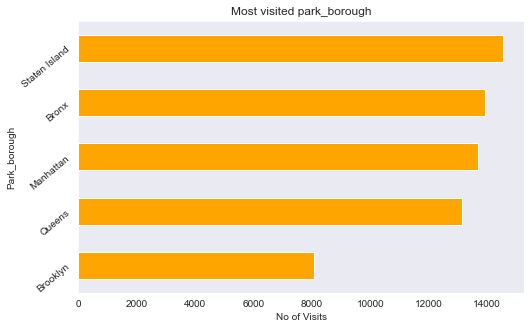

In [23]:
sns.set_style("dark")
data["park_borough"].value_counts().sort_values().plot(kind="barh",rot=40, color="orange",figsize=(8,5));
plt.title("Most visited park_borough");
plt.xlabel("No of Visits");
plt.ylabel("Park_borough");


The Staten Island is the most visted park borough. It is then followed by Bronx, Manhatten and queen park boroughs. In these locations, Parks Enforcement Patrol and the Urban Park Rangers has either encounters with people and they were educated on social distancing or they are not encoutered with people at all.

Question 3: Which park borough has maximum number of visits by Enforcement Patrol and the Urban Park Rangers since there were complaint raised ? 

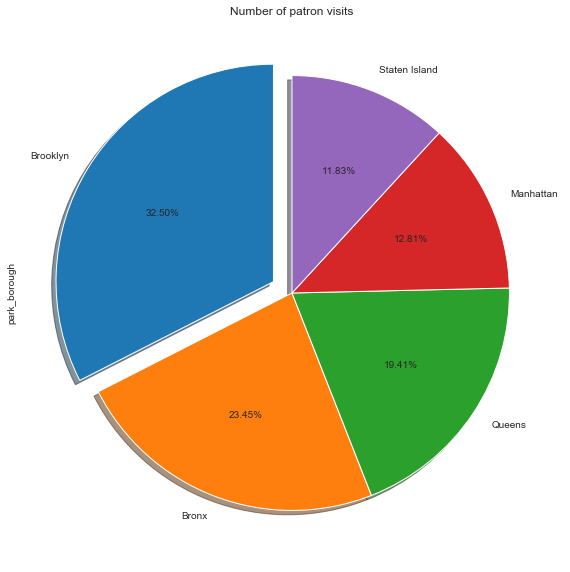

In [24]:
newdata = data[(data.visit_reason == "complaint") & (data.encounter_type == "Yes, patrons educated on social distancing (not trespassing)") | (data.encounter_type ==  "Yes, patrons who trespassed/violated rules")]

x1=newdata.park_borough.value_counts()
my_explode = (0.1,0,0,0,0)
ax = x1.plot.pie(title="Number of patron visits", y="park_borough",shadow = True, explode=my_explode,
                 startangle=90,figsize=(10,10), autopct='%1.2f%%');

In the pie chart, it is evident that Brooklyn park borough has maximum number of Enforcement Patrol and the Urban Park Rangers visits because of complaints.
Both park boroughs constitutes more than 55% visits of total visits. This means that at these two locations, park authorities should 


Question 4 : Which days has maximum number of encounters of Enforcement Patrol and the Urban Park Rangers in all park boroughs ?

In [25]:
# check which day has for maximum visits (all)
max_day = data['day'].value_counts()
max_day
# Saturday, sunday has max visits

Sunday       9495
Saturday     9473
Thursday     9228
Friday       8949
Wednesday    8942
Monday       8931
Tuesday      8252
Name: day, dtype: int64

In [26]:
# check which time of the day has for maximum visits (all)
most_visited_time = data['Time'].value_counts()
most_visited_time

## at 15.00, 15.30, and 16.00 in afternoon
## at 10.00, 11.00 in morning

15:00:00    718
11:00:00    679
15:30:00    637
16:00:00    576
10:00:00    567
           ... 
05:50:00      1
01:52:00      1
01:16:00      1
23:49:00      1
04:48:00      1
Name: Time, Length: 1332, dtype: int64

In [27]:
# applying conditions of encounter types

max_visit_day = data[((data.encounter_type == "No encounter with non-complaint patrons, but the park was CROWDED") | 
                    (data.encounter_type == "Yes, patrons educated on social distancing (not trespassing") |
                    (data.encounter_type == "Yes, patrons who trespassed") |
                    (data.encounter_type == "Yes, patrons who trespassed/violated rules"))&
                    ((data.day =="Sunday") | (data.day =="Saturday")) ]  
max_visit_day

,park_area_id,park_division,visit_reason,patrol_method,encounter_type,simplified_encounter_type,closed_amenity,closed_patroncount,park_borough,Date,Time,day
283,R147,PEP,Standard Patrol,Mobile,"No encounter with non-complaint patrons, but t...",No Encounter,Other,2.0,Staten Island,2020-06-07,20:44:00,Sunday
332,M005-02,PEP,Standard Patrol,Mobile,"No encounter with non-complaint patrons, but t...",No Encounter,Other,2.0,Manhattan,2020-06-07,18:00:00,Sunday
406,M089,PEP,Standard Patrol,Mobile,"No encounter with non-complaint patrons, but t...",No Encounter,Other,2.0,Manhattan,2020-06-07,15:00:00,Sunday
407,MT13,PEP,Standard Patrol,Mobile,"No encounter with non-complaint patrons, but t...",No Encounter,Other,2.0,Manhattan,2020-06-07,15:00:00,Sunday
433,M399,PEP,Standard Patrol,Mobile,"No encounter with non-complaint patrons, but t...",No Encounter,Other,2.0,Manhattan,2020-06-07,14:00:00,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
63222,M077-04,PEP,Standard Patrol,Mobile,"No encounter with non-complaint patrons, but t...",No Encounter,Other,2.0,Manhattan,2020-11-22,12:00:00,Sunday
63239,X136-01,Rangers,Standard Patrol,Mobile,"No encounter with non-complaint patrons, but t...",No Encounter,Other,2.0,Bronx,2020-11-22,15:41:00,Sunday
63257,X201,Rangers,Standard Patrol,Mobile,"No encounter with non-complaint patrons, but t...",No Encounter,Other,2.0,Bronx,2020-11-22,15:09:00,Sunday
63286,B057,Rangers,Standard Patrol,Mobile,"No encounter with non-complaint patrons, but t...",No Encounter,Other,2.0,Brooklyn,2020-11-22,13:30:00,Sunday


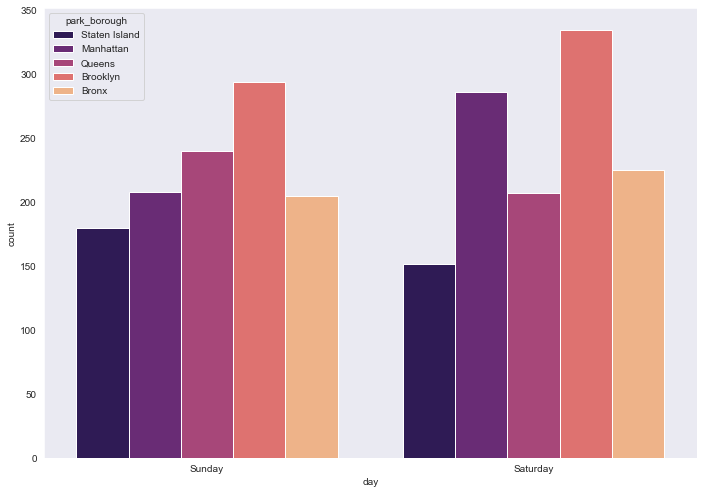

In [28]:
#plot the park_borough where maximum number of encounters happened on saturday and sunday 
sns.countplot(max_visit_day['day'], palette='magma', hue= 'park_borough',data=max_visit_day);
plt.gcf().set_size_inches(11.7, 8.27)
plt.show()

 Saturday and Sunday has maximum number of encounters of Enforcement Patrol and the Urban Park Rangers. However, Brooklyn is top in 
    encounters on both these days. Manhatten park borough is sencond highest on Saturday while on Sunday its Queens borough. 

Question 5: There were complains issued or dispatch (called over radio communication from central agency
    but in reality there were no encounters. How many such incidents happened and in which park locations? How to do Enforcement Patrol and the Urban Park Rangers management?

In [29]:
complain_visit_no_enc =  data[((data.encounter_type == "No encounter")) & 
                              ((data.visit_reason == "Complaint") | (data.visit_reason == "Dispatch"))]
complain_visit_no_enc

,park_area_id,park_division,visit_reason,patrol_method,encounter_type,simplified_encounter_type,closed_amenity,closed_patroncount,park_borough,Date,Time,day
3949,Q351,PEP,Complaint,On foot,No encounter,No Encounter,Other,2.0,Queens,2020-06-24,17:18:00,Wednesday
3966,X290,PEP,Dispatch,Mobile,No encounter,No Encounter,Other,2.0,Bronx,2020-06-24,14:05:00,Wednesday
3995,M011,PEP,Complaint,Mobile,No encounter,No Encounter,Other,2.0,Manhattan,2020-06-24,15:45:00,Wednesday
4023,B095,PEP,Complaint,Mobile,No encounter,No Encounter,Other,2.0,Brooklyn,2020-06-24,14:36:00,Wednesday
4067,M013,PEP,Dispatch,Mobile,No encounter,No Encounter,Other,2.0,Manhattan,2020-06-24,12:55:00,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
30844,M010-089,Rangers,Complaint,On foot,No encounter,No Encounter,Other,2.0,Manhattan,2020-04-16,10:46:00,Thursday
30848,M010-202,Rangers,Complaint,On foot,No encounter,No Encounter,Other,2.0,Manhattan,2020-04-16,10:45:00,Thursday
31003,B047,PEP,Complaint,Mobile,No encounter,No Encounter,Other,2.0,Brooklyn,2020-04-15,12:44:00,Wednesday
31043,B016,PEP,Complaint,Mobile,No encounter,No Encounter,Other,2.0,Brooklyn,2020-04-15,15:44:00,Wednesday


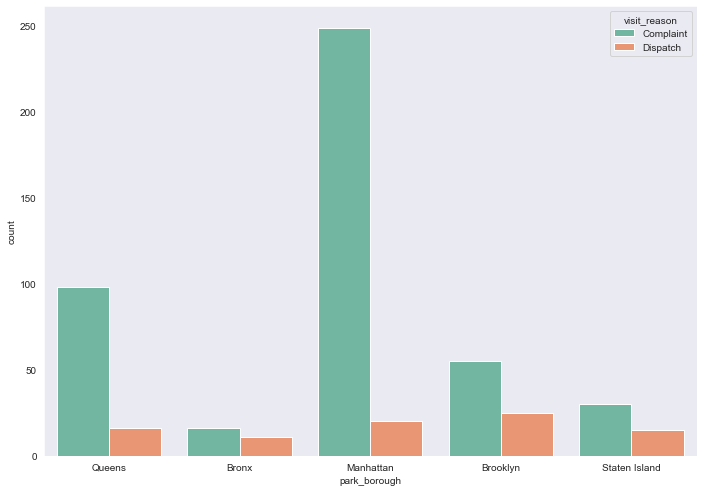

In [30]:
sns.countplot(complain_visit_no_enc['park_borough'],palette='Set2', hue= 'visit_reason',data=complain_visit_no_enc);
plt.gcf().set_size_inches(11.7, 8.27);
plt.show();

This helps in identifying the most complaint prone areas where no encounter happened. 
The park authorities can have better understanding of the deploying patrons and controll the confrontations in the areas where there were some or more encounters.